
# Yearly Non-Domestic Demand Profile for Kennington #

This is just looking at the non-domestic electricity consumption (so not including the added demand from electrificaiton of gas or non-domestic businesses).

**Author:** Minnie Karanjavala

**Date:** Janurary 23rd, 2021

**College:** St Peter's

## Goal:

- to produce a yearly non-domestic demand profile for current electricity consumption in Kennington (not incl electrification of gas)

- find a scale factor which scales the average UK demand profile to match Kennington's annual usage

- OUTPUT = I want to produce a csv file which has 365*48 data points which is the non-domestic electricity demand profile for the year


### NOTE: this version of the model just repeats Autumn weekday profile 365 times to make annual profile


## Plan:
- first plot profile of 24hrs for a summer day 
- then form a year profile from 365 summer days strung together 
- find the scale factor needed so the annual energy consumption from the yearly profile of 365 summer days matches kennington's annual non-domestic profile

In [28]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pickle
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statistics

In [29]:
# data_path = 'data/'

# filename = 'ProfileClass3.csv'  # file containing the non-domestic unrestricted 

# non_domestic_load_df = pd.read_csv(data_path+filename)    # converts csv to dataframe

non_domestic_load_df = pd.read_csv('../../data/ProfileClass3.csv')    # converts csv to dataframe

In [30]:
non_domestic_load_df.head(10)   #having a look at the data

,Time,Aut Wd,Aut Sat,Aut Sun,Hsr Wd,Hsr Sat,Hsr Sun,Smr Wd,Smr Sat,Smr Sun,Spr Wd,Spr Sat,Spr Sun,Wtr Wd,Wtr Sat,Wtr Sun
0,00:30,0.60,0.65,0.68,0.63,0.68,0.67,0.62,0.68,0.68,0.64,0.66,0.70,0.70,0.71,0.73
1,01:00,0.57,0.61,0.65,0.59,0.63,0.63,0.59,0.64,0.64,0.60,0.61,0.63,0.77,0.77,0.79
2,01:30,0.56,0.60,0.62,0.57,0.62,0.61,0.58,0.61,0.60,0.60,0.59,0.62,0.78,0.78,0.79
3,02:00,0.55,0.57,0.59,0.56,0.60,0.58,0.58,0.61,0.59,0.64,0.63,0.64,0.76,0.76,0.76
4,02:30,0.54,0.56,0.57,0.56,0.57,0.57,0.57,0.59,0.57,0.63,0.62,0.65,0.76,0.75,0.74
5,03:00,0.54,0.55,0.55,0.55,0.57,0.56,0.56,0.59,0.55,0.62,0.62,0.63,0.75,0.75,0.73
6,03:30,0.54,0.55,0.54,0.55,0.57,0.56,0.56,0.58,0.56,0.62,0.60,0.61,0.75,0.75,0.73
7,04:00,0.54,0.55,0.53,0.55,0.58,0.56,0.56,0.57,0.54,0.62,0.59,0.60,0.75,0.74,0.72
8,04:30,0.56,0.55,0.54,0.56,0.58,0.55,0.58,0.57,0.54,0.62,0.60,0.60,0.77,0.76,0.72
9,05:00,0.56,0.55,0.53,0.56,0.57,0.56,0.58,0.58,0.55,0.63,0.60,0.61,0.79,0.76,0.71


In [31]:
non_domestic_load_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     48 non-null     object 
 1   Aut Wd   48 non-null     float64
 2   Aut Sat  48 non-null     float64
 3   Aut Sun  48 non-null     float64
 4   Hsr Wd   48 non-null     float64
 5   Hsr Sat  48 non-null     float64
 6   Hsr Sun  48 non-null     float64
 7   Smr Wd   48 non-null     float64
 8   Smr Sat  48 non-null     float64
 9   Smr Sun  48 non-null     float64
 10  Spr Wd   48 non-null     float64
 11  Spr Sat  48 non-null     float64
 12  Spr Sun  48 non-null     float64
 13  Wtr Wd   48 non-null     float64
 14  Wtr Sat  48 non-null     float64
 15  Wtr Sun  48 non-null     float64
dtypes: float64(15), object(1)
memory usage: 6.1+ KB


**Preprocessing data**
- i'm not sure if I need to covert the Time column from a 'object' datatype to a datetime datatype? I will convert it in the cell below just in case

In [32]:
#change data type of 'Time' column into datetime

non_domestic_load_df['Time'] = pd.to_datetime(non_domestic_load_df['Time'])

non_domestic_load_df.head(5)
#non_domestic_load_df.info()

,Time,Aut Wd,Aut Sat,Aut Sun,Hsr Wd,Hsr Sat,Hsr Sun,Smr Wd,Smr Sat,Smr Sun,Spr Wd,Spr Sat,Spr Sun,Wtr Wd,Wtr Sat,Wtr Sun
0,2021-03-08 00:30:00,0.60,0.65,0.68,0.63,0.68,0.67,0.62,0.68,0.68,0.64,0.66,0.70,0.70,0.71,0.73
1,2021-03-08 01:00:00,0.57,0.61,0.65,0.59,0.63,0.63,0.59,0.64,0.64,0.60,0.61,0.63,0.77,0.77,0.79
2,2021-03-08 01:30:00,0.56,0.60,0.62,0.57,0.62,0.61,0.58,0.61,0.60,0.60,0.59,0.62,0.78,0.78,0.79
3,2021-03-08 02:00:00,0.55,0.57,0.59,0.56,0.60,0.58,0.58,0.61,0.59,0.64,0.63,0.64,0.76,0.76,0.76
4,2021-03-08 02:30:00,0.54,0.56,0.57,0.56,0.57,0.57,0.57,0.59,0.57,0.63,0.62,0.65,0.76,0.75,0.74


In [33]:
#print(non_domestic_load_df['Time'].dt.time)
print(non_domestic_load_df['Time'].dt.strftime("%X"))

0     00:30:00
1     01:00:00
2     01:30:00
3     02:00:00
4     02:30:00
5     03:00:00
6     03:30:00
7     04:00:00
8     04:30:00
9     05:00:00
10    05:30:00
11    06:00:00
12    06:30:00
13    07:00:00
14    07:30:00
15    08:00:00
16    08:30:00
17    09:00:00
18    09:30:00
19    10:00:00
20    10:30:00
21    11:00:00
22    11:30:00
23    12:00:00
24    12:30:00
25    13:00:00
26    13:30:00
27    14:00:00
28    14:30:00
29    15:00:00
30    15:30:00
31    16:00:00
32    16:30:00
33    17:00:00
34    17:30:00
35    18:00:00
36    18:30:00
37    19:00:00
38    19:30:00
39    20:00:00
40    20:30:00
41    21:00:00
42    21:30:00
43    22:00:00
44    22:30:00
45    23:00:00
46    23:30:00
47    00:00:00
Name: Time, dtype: object


## Summer vs Winter plots (weekday + weekend)
Next I am going to plot out some of the demand profiles for different seasons and weekdays vs weekend to see what they look like

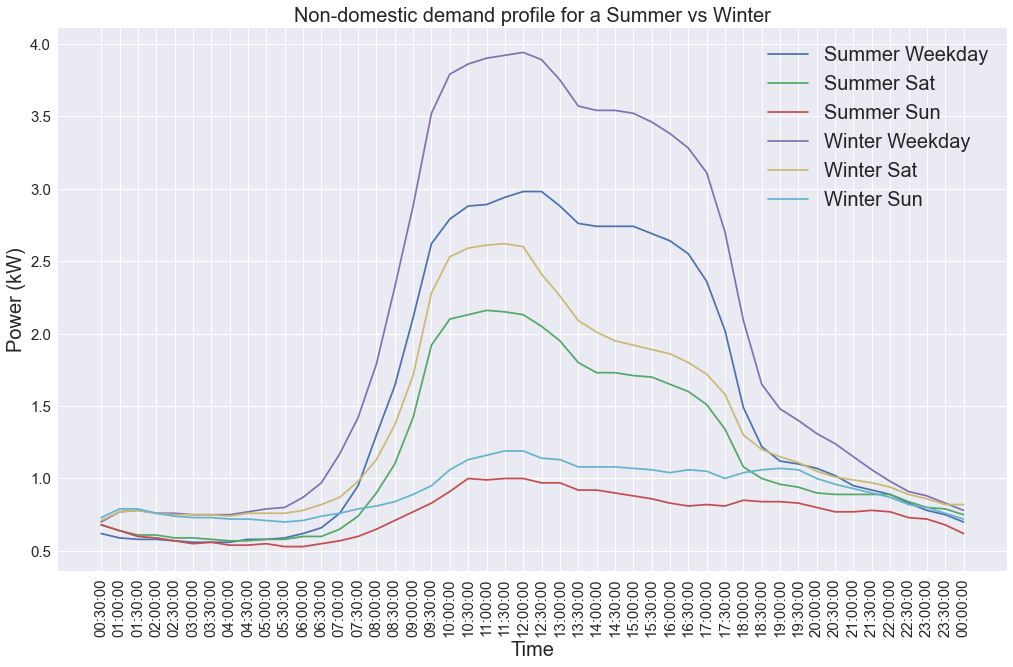

In [53]:
#plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(17,10))

ax.plot(non_domestic_load_df['Time'].dt.strftime("%X"),non_domestic_load_df['Smr Wd'], label = "Summer Weekday")

ax.plot(non_domestic_load_df['Time'].dt.strftime("%X"),non_domestic_load_df['Smr Sat'], label = "Summer Sat")

ax.plot(non_domestic_load_df['Time'].dt.strftime("%X"),non_domestic_load_df['Smr Sun'], label = "Summer Sun")

ax.plot(non_domestic_load_df['Time'].dt.strftime("%X"),non_domestic_load_df['Wtr Wd'], label = "Winter Weekday")

ax.plot(non_domestic_load_df['Time'].dt.strftime("%X"),non_domestic_load_df['Wtr Sat'], label = "Winter Sat")

ax.plot(non_domestic_load_df['Time'].dt.strftime("%X"),non_domestic_load_df['Wtr Sun'], label = "Winter Sun")

ax.legend(prop={'size':20})

#ax.plot(non_domestic_load_df['Time'].dt.time,non_domestic_load_df['Smr Wd'])    
## ^^ this won't work as the x-axis labels need to be a string not 'datetime.time'

ax.set(xlabel="Time",
    ylabel = "Power (kW)",
    title = 'Non-domestic demand profile for a Summer vs Winter');

plt.xticks(rotation=90);

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

ax.tick_params(axis='both', which='major', labelsize=15)



## Form a yearly demand profile
- for this first iteration I am just going to repeat the demand from a autumn week day 365 times to make a yearly profile 

Things to try:
- pd.add ~ this adds a scalar value to all elements 
- pd.combine ~ combines two dataframes column by column 
- pd.join
- pd.merge


I decided to turn my values into a numpy array as it is much easier to work with them in this format then as a dataframe.


NOTE: I need to run my cells in order to be able to see what I was testing here.

In [35]:
tester_daily_load = non_domestic_load_df['Aut Wd'].values

type(tester_daily_load)    # confirm datatype is numpy array from the .values


numpy.ndarray

In [36]:
tester_daily_load  # look at array

array([0.6 , 0.57, 0.56, 0.55, 0.54, 0.54, 0.54, 0.54, 0.56, 0.56, 0.58,
       0.64, 0.71, 0.89, 1.08, 1.41, 1.82, 2.24, 2.77, 2.97, 3.02, 3.07,
       3.09, 3.13, 3.1 , 2.98, 2.83, 2.81, 2.82, 2.82, 2.76, 2.69, 2.57,
       2.4 , 2.09, 1.61, 1.34, 1.26, 1.23, 1.19, 1.13, 1.04, 0.96, 0.9 ,
       0.85, 0.78, 0.74, 0.69])

In [37]:
tester_daily_load.shape

(48,)

In [38]:
i = 1
tester_annual_load = tester_daily_load

while i <= 3:
    # NOTE: do not just concatenate tester_annual_load to itself each time cos then as the array grows we will be adding the concatenated version on each time
    tester_annual_load = np.concatenate((tester_annual_load,tester_daily_load), axis=None)     # this is how we can add one column onto another 
    i += 1      # I had an infinite loop cos I forgot this line
tester_annual_load[48:]
tester_annual_load.shape

(192,)

In [39]:
np.sum(tester_daily_load)

76.57

# Code for Basic Annual Profile
Above I was just doing some basic testing out of how to concatenate two arrays together so that we can combine the 48 datapoints of one day into 365*48 data points for a year.  

Now I am going to create the yearly profile:

In [40]:
# Extract Autumn Weekday data from dataframe and turn it to a numpy array 
non_dom_daily_load = non_domestic_load_df['Aut Wd'].values
non_dom_daily_load.shape

(48,)

In [41]:
# concatenate the daily profile to itself 365 time to form annual profile
i = 1
non_dom_annual_load = []

while i <= 365:
    non_dom_annual_load = np.concatenate((non_dom_annual_load,non_dom_daily_load), axis=None) 
    i += 1

print(non_dom_annual_load.size)
print(non_dom_annual_load)
print(np.sum(non_dom_annual_load))


17520
[0.6  0.57 0.56 ... 0.78 0.74 0.69]
27948.05


## Find the scale factor for Kennington
This will scale the average UK annual consumption of one non-domestic user to Kennington's annual non-domestic consumption.

### NOTE: be very careful to clearly distinguish between what is energy (kWh) and power (kW)

In [42]:
ken_annual_nd_usage = 1160000   #kWh ~ this is for all the non-domestic users in Kennington not just one

ken_nd_users = 36   # businesses in Kennington

ken_avg_annual_usage_per_nd_user = ken_annual_nd_usage/ken_nd_users # avg annual energy (kWh) userage PER NON DOM USER in ken 

UK_avg_anuual_usage_per_nd_user = np.sum(non_dom_annual_load)*0.5 #the non_dom_annual_load array is POWER for every 0.5hr so we need to CON it from kW to kWh by *0.5hr

UK_avg_anuual_usage_per_nd_user

13974.025

From these numbers it's as if Kennington has ~ ken annual non-dom usage/annual usage of one business = 1160000/13974 = 83 businesses.

However Kennington actually has 36 non-domestic properties but 5 of them are schools which have a much higher electricity usage than the average small business like a shop or cafe which explains the overestimation of the number of businesses in Kennignton. 

In [43]:
SF = ken_avg_annual_usage_per_nd_user/UK_avg_anuual_usage_per_nd_user # SF = scale factor 

SF

2.3058655056236286

In [44]:
ken_avg_nd_load_profile = non_dom_annual_load*SF    # non_dom_annual_load = POWER demand profile for average UK non-dom user so ken_avg_nd_load_profile is also POWER values (kW)
print(ken_avg_nd_load_profile.size)
print(np.sum(ken_avg_nd_load_profile))  # if you multiply this by 36 (ie num of nd users in ken) this doesn't match the total ENERGY (kW) usage of kennington. This is cos this value is POWER (kW) NOT energy
print(ken_avg_nd_load_profile)

17520
64444.44444444445
[1.3835193  1.31434334 1.29128468 ... 1.79857509 1.70634047 1.5910472 ]


## Write output to CSV file

- pd.to_csv

In [45]:
#convert numpy array to dataframe
ken_nd_df = pd.DataFrame(ken_avg_nd_load_profile, columns=['kW'])
print(ken_nd_df.head())
ken_nd_df.info()

         kW
0  1.383519
1  1.314343
2  1.291285
3  1.268226
4  1.245167
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kW      17520 non-null  float64
dtypes: float64(1)
memory usage: 137.0 KB


In [46]:
#write dataframe to a csv file 
ken_nd_df.to_csv('ken_non_dom_annual_load_Aut_Wd.csv',index=False)

## Plot the output for Presentation

In [47]:
index = np.arange(1,len(ken_avg_nd_load_profile)+1,1)
print(index)
index.size

[    1     2     3 ... 17518 17519 17520]


17520

In [48]:
x = ken_avg_nd_load_profile[0:48]
x.size

48

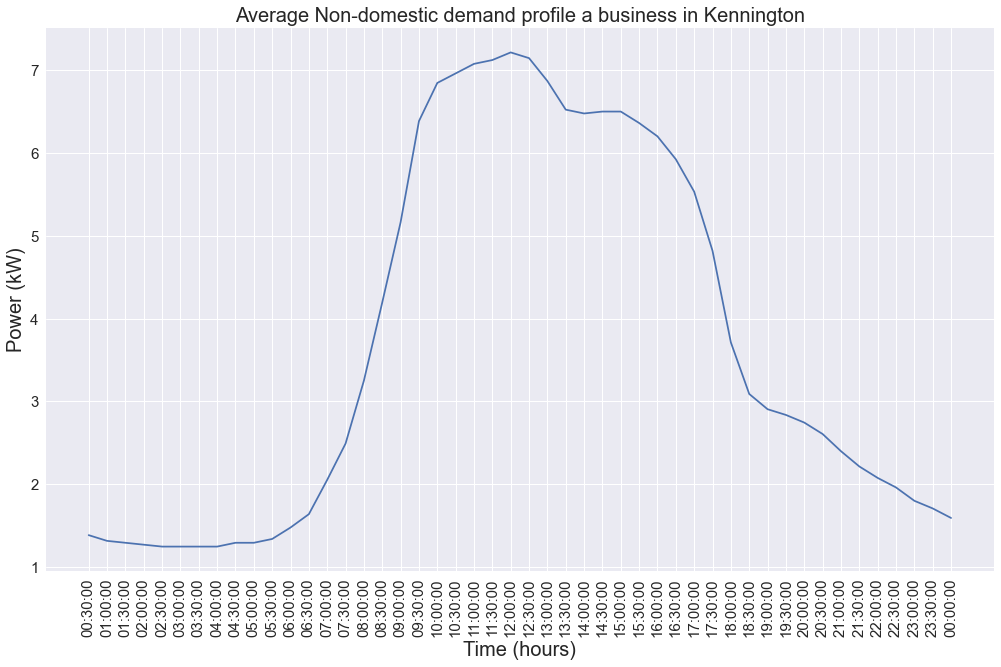

In [49]:
fig1, ax1 = plt.subplots(figsize=(17,10))

ax1.plot(non_domestic_load_df['Time'].dt.strftime("%X"),x)

ax1.set(xlabel="Time (hours)",
    ylabel = "Power (kW)",
    title = 'Average Non-domestic demand profile a business in Kennington');

plt.xticks(rotation=90);

ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)
ax1.title.set_size(20)

ax1.tick_params(axis='both', which='major', labelsize=15)

### Plot annual demand profile 
I want to find the average usage for every day (so I have oen data point per day as opposed to 48) then I will plot this over the 365 days of the year.

Here I have just used an Autumn weekday repeated 365 times therefore the daily average will be the same each day but once I have used the seasonal variation I will be able to see how the demand changes over the year.

In [50]:
daily_mean = []

for i in range(365):
    #daily_mean(i) = mean(ken_avg_nd_load_profile[i*48:48*(i+1)])
    daily_mean.append(np.mean(ken_avg_nd_load_profile[0:48])) 
    i += 1
print(len(daily_mean))
daily_mean

365


[3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701166926,
 3.6783358701

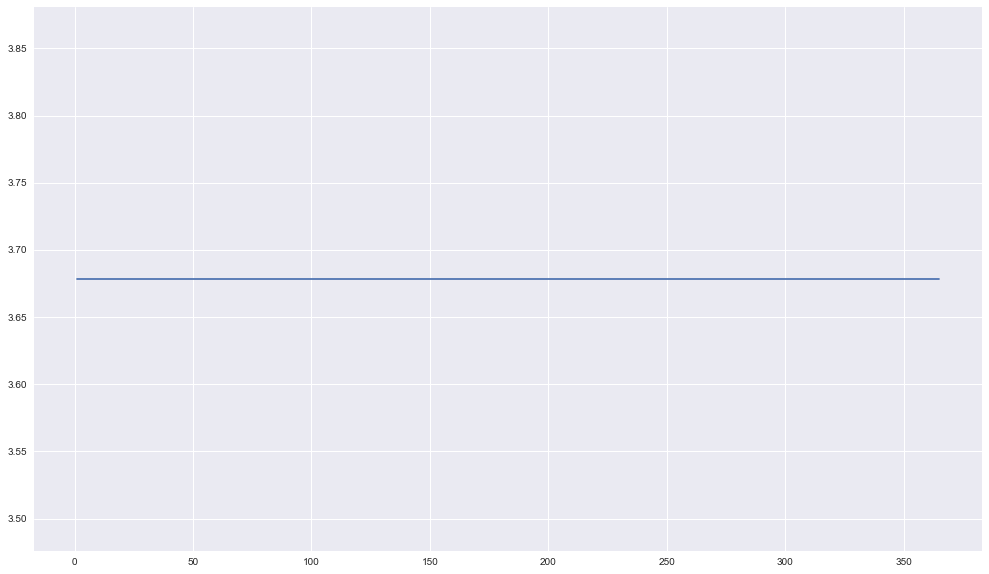

In [51]:
fig2, ax2 = plt.subplots(figsize=(17,10))
day = np.arange(1,366)
ax2.plot(day,daily_mean)
